<a href="https://www.kaggle.com/code/sedadlger/rfm-analysis-customer-segmentation?scriptVersionId=149590752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

****RFM analizi nedir?****

RFM(Recency, Frequency, Monetary) analizi, bir işletmenin müşteri davranışlarını inceleyeyen ve bunları anlamlı hale getiren bir pazarlama analizidir. 

RFM analizi ile müşteri segmentasyonu yapılarak her bir segment için startejiler geliştirilir. Özete RFM, CRM (Customer Relationship Management) müşteri ilişkileri yönetiminde bir işletmenin müşterileriyle etkileşimlerini anlamak, ilişkilerini güçlendirmek ve müşteri sadakatini artırmak için kullandığı bir stratejidir.

Aşağıda örnek bir dataseti üzerinden RFM analizi basamaklarını uygulayarak yorumlamaya çalışacağız. 


****VERİ SETİ HİKAYESİ****

Veri seti son alışverişlerini 2020 - 2021 yıllarında hem online hem offline alışveriş yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.


master_id: Eşsiz müşteri numarası

order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı 
(Android, ios, Desktop, Mobile, Offline)

last_order_channel : En son alışverişin yapıldığı kanal

first_order_date : Müşterinin yaptığı ilk alışveriş tarihi

last_order_date : Müşterinin yaptığı son alışveriş tarihi

last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi

order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı

order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı

customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret

customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret

interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

****Veriyi yükleme, anlama ve analiz etme****

In [1]:
import datetime as dt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Virgülden sonra kaç basamak istiyoruz?
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_ = pd.read_csv("/kaggle/input/rfm-analizi/flo_data_20k.csv")
df = df_.copy()

#Yukarıda datframe için bir kopya oluşturarak kopya üzerinden çalışmaya devam ettik, 
#böylece bir pronlem olduğunda df yükleme işlemini tekrar bekmek durumunda kalmayacağız


In [3]:
# Veri setinde ilk 5 gözleme bir bakalım:

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [4]:
# Değişken isimleri:

df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [5]:
# Betimsel istatistik:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [6]:
# Veri setinde boş değervar mı:

df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [7]:
# Değişken tiplerini inceleyelim:

df.dtypes


master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [8]:
# Müşterilerin hem online'dan hemde offline platformlardan alışveriş yapmaktadır.
# Herbir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturun.

# online + offline alışveriş
df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["total_order"].head()

0    5.000
1   21.000
2    5.000
3    2.000
4    2.000
Name: total_order, dtype: float64

In [9]:
# online + offline alışverişlte toplam harcanan para
df["total_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df["total_value"].head()

0    939.370
1   2013.550
2    585.320
3    121.970
4    209.980
Name: total_value, dtype: float64

In [10]:
# Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

df.dtypes

# date içeren kolonarı seçtik;

df_date_cols = df.columns[df.columns.str.contains("date")]

# bunların türünü tarihe çevirdik;

df[df_date_cols] = df[df_date_cols].astype('datetime64[ns]')

df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order                                 float64
total_value                                 float64
dtype: object

In [11]:

# Alışveriş kanalalarına göre (Android, ios, Desktop, Mobile) alına ürün sayısının ve harcamaların ortalamasına bakınız:

df.groupby("order_channel").agg({"master_id": "count", "total_value": "mean", "total_order": "sum"})

,master_id,total_value,total_order
order_channel,,,
Android App,9495,823.493,52269.000
Desktop,2735,588.783,10920.000
Ios App,2833,891.634,15351.000
Mobile,4882,620.275,21679.000


In [12]:
# En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

df.sort_values("total_order", ascending=False)[:10]["master_id"]


11150    5d1c466a-9cfd-11e9-9897-000d3a38a36f
7223     cba59206-9dd1-11e9-9897-000d3a38a36f
8783     a57f4302-b1a8-11e9-89fa-000d3a38a36f
2619     fdbe8304-a7ab-11e9-a2fc-000d3a38a36f
6322     329968c6-a0e2-11e9-a2fc-000d3a38a36f
7613     73fd19aa-9e37-11e9-9897-000d3a38a36f
9347     44d032ee-a0d4-11e9-a2fc-000d3a38a36f
10954    b27e241a-a901-11e9-a2fc-000d3a38a36f
8068     d696c654-2633-11ea-8e1c-000d3a38a36f
7330     a4d534a2-5b1b-11eb-8dbd-000d3a38a36f
Name: master_id, dtype: object

In [13]:
# Tüm bu süreçleri fonksiyonlaştırarak benzer bir veri seti geldiğinde ilgili 
# fonkisyonu çağırarak hızlıca bir analiz yapabiliriz.

def veri_on_hazirlik(df, csv=False):
    print(df.describe().T)
    print(df.isnull().sum())
    df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    print(df["total_order"].head())
    df["total_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
    print(df["total_value"].head())
    print(df.groupby("order_channel").agg({"total_order": ["count", "sum", "mean"]}))
    print(df.groupby("order_channel").agg({"total_value": ["count", "sum", "mean"]}))
    print(df.groupby("order_channel").agg({"master_id": "count", "total_value": "mean", "total_order": "sum"}))
    print(df.sort_values("total_order", ascending=False)[:10]["master_id"])
    return

df = df_.copy()
hazir_veri = veri_on_hazirlik(df, csv=True)


                                      count    mean     std    min     25%  \
order_num_total_ever_online       19945.000   3.111   4.226  1.000   1.000   
order_num_total_ever_offline      19945.000   1.914   2.063  1.000   1.000   
customer_value_total_ever_offline 19945.000 253.923 301.533 10.000  99.990   
customer_value_total_ever_online  19945.000 497.322 832.602 12.990 149.980   

                                      50%     75%       max  
order_num_total_ever_online         2.000   4.000   200.000  
order_num_total_ever_offline        1.000   2.000   109.000  
customer_value_total_ever_offline 179.980 319.970 18119.140  
customer_value_total_ever_online  286.460 578.440 45220.130  
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_onlin

****RFM Metriklerinin hesaplanması****

In [14]:
# Recency(yenilik) = analiz tarihi - son satın alma tarihi
# Frequency=sıklık
# Monetary=bırakılan toplam parasal değer

df["last_order_date_online"].max()
df["last_order_date_offline"].max()

#Analiz tarihini, today_date, en son sipariş tarihinden iki gün sonra aldık:

import datetime as dt

today_date = dt.datetime(2021, 6, 1)


In [15]:
rfm = df.groupby("master_id").agg(
    {"last_order_date": lambda x: (pd.to_datetime(today_date) - pd.to_datetime(x.max())).days,
     "total_order": lambda x: x,
     "total_value": lambda x: x})
rfm.head()

# Buradaki x.max() agg fonkisyonun  beklentisi olduğu için kullandık.

,last_order_date,total_order,total_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330


In [16]:
#Kolon isimlerini "recency", "frequency", "monetary" olarak güncelleyelim:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#Veriyi görsel olarak incelemek ve aykırı değereler var mı bakmak için birkaç grafik çizdirelim:

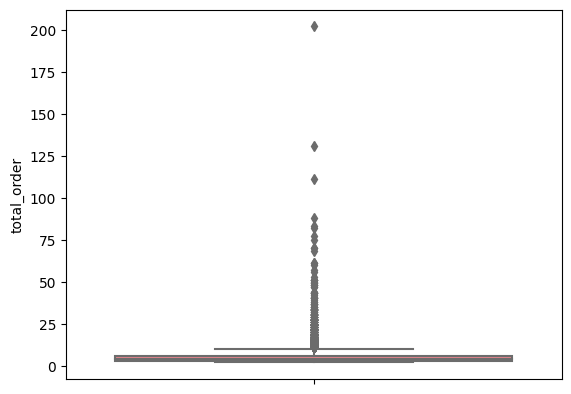

In [18]:
sns.boxplot(data=df, y="total_order", color="#F67280")
plt.show(block=True)

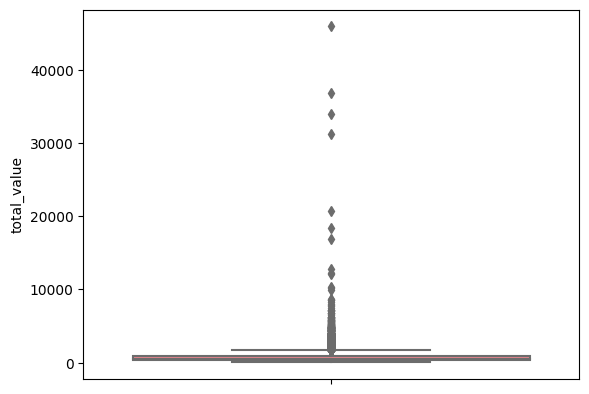

In [19]:
sns.boxplot(data=df, y="total_value", color="#F67280")
plt.show(block=True)

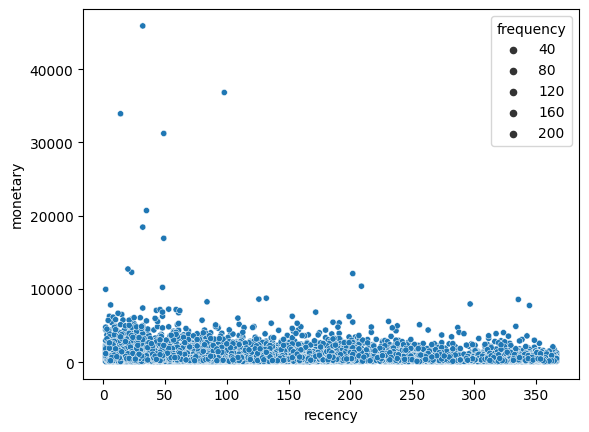

In [20]:
sns.scatterplot(data=rfm, x='recency', y="monetary", size="frequency", sizes=(20, 20))
plt.show(block=True)


In [21]:
# RFM Skorlarının Hesaplanması

# Burada amaç veriyi standartlaştırmak:

# Recency'de küçük olana büyük değer atamasını istiyoruz
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# rank(method="first"), ilk gördüğünü ilk sınıfa ata, aynı sayıda frekansa sahip olanlar var, bölemiyorum
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Monetary'de küçük olana küçük değer
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [22]:
print(rfm["RFM_SCORE"].head())

master_id
00016786-2f5a-11ea-bb80-000d3a38a36f    54
00034aaa-a838-11e9-a2fc-000d3a38a36f    12
000be838-85df-11ea-a90b-000d3a38a36f    23
000c1fe2-a8b7-11ea-8479-000d3a38a36f    54
000f5e3e-9dde-11ea-80cd-000d3a38a36f    54
Name: RFM_SCORE, dtype: object


In [23]:
#Betimsel istatistiğe bir göz atalım:

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.000,134.458,103.281,2.000,43.000,111.000,202.000,367.000
frequency,19945.000,5.025,4.743,2.000,3.000,4.000,6.000,202.000
monetary,19945.000,751.244,895.402,44.980,339.980,545.270,897.780,45905.100


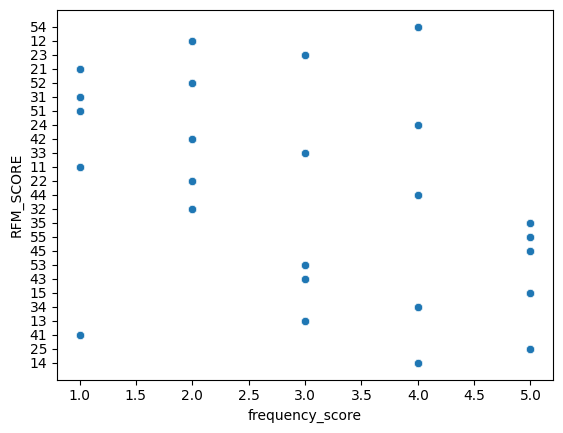

In [24]:
sns.scatterplot(data=rfm, x="frequency_score", y="RFM_SCORE", sizes=(20, 20))
plt.show(block=True)

In [25]:
# RFM Skorlarının Segment Olarak Tanımlanması


seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


In [26]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
# regex, regular expresion
rfm = rfm[["recency", "frequency", "monetary", "segment"]]

In [27]:
rfm.head()

,recency,frequency,monetary,segment
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,champions


In [28]:
# Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

rfm.groupby("segment").agg({"recency": ["mean"],
                            "frequency": ["mean"],
                            "monetary": ["mean"]})

,recency,frequency,monetary
,mean,mean,mean
segment,,,
about_to_sleep,114.032,2.407,361.649
at_Risk,242.329,4.470,648.325
cant_loose,235.159,10.717,1481.652
champions,17.142,8.965,1410.709
hibernating,247.426,2.391,362.583
loyal_customers,82.558,8.356,1216.257
need_attention,113.037,3.739,553.437
new_customers,17.976,2.000,344.049


In [29]:
# Sadık müşterilerinden(champions,loyal_customers),ortalama 250 TL üzeri ve kadın 
# kategorisinden alışveriş yapan kişiler 
# özel olarak iletişim kuralacak müşteriler. 
# Bu müşterilerin id numaralarını csv dosyasına yeni_marka_hedef_müşteri_id.cvs 
# olarak kaydediniz.

# segmentlerden seçim yaptık:
segmentsecim = rfm[(rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")]
type(segmentsecim)

# df üzerinden seçim yaptık
kategorisecim = df[df["interested_in_categories_12"].str.contains("KADIN") & (df["total_value"] > 250)]
type(kategorisecim)

# iki dataframe'i master id'ye göre birleştirdik: 
yeni_marka_hedef_müsteri_id = pd.merge(segmentsecim, kategorisecim, on=["master_id"])
print(yeni_marka_hedef_müsteri_id.head())


                              master_id  recency  frequency  monetary  \
0  000c1fe2-a8b7-11ea-8479-000d3a38a36f       27      7.000   874.160   
1  003903e0-abce-11e9-a2fc-000d3a38a36f       68      5.000   577.470   
2  004bec18-9f7a-11e9-a2fc-000d3a38a36f       99     12.000   684.910   
3  00534fe4-a6b4-11e9-a2fc-000d3a38a36f       63     16.000   800.590   
4  009293fe-1f3e-11ea-87bf-000d3a38a36f      129      6.000   725.180   

           segment order_channel last_order_channel first_order_date  \
0        champions   Android App        Android App       2020-06-07   
1  loyal_customers   Android App        Android App       2017-03-27   
2  loyal_customers        Mobile            Offline       2013-09-08   
3  loyal_customers   Android App            Desktop       2014-01-28   
4  loyal_customers       Ios App            Ios App       2019-02-21   

  last_order_date last_order_date_online last_order_date_offline  \
0      2021-05-05             2021-05-05              2021-0

In [30]:
# Erkek ve Çoçuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir
# alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniliyor. Uygun profildeki müşterilerin id'lerini csv dosyasına indirim_hedef_müşteri_ids.csv
# olarak kaydediniz.

segment_in_danger = rfm[(rfm["segment"] == "new_customers") |
                        (rfm["segment"] == "about_to_sleep") |
                        (rfm["segment"] == "cant_loose")]

segment_in_danger.to_csv("segment_in_danger.csv")


In [31]:
segment_in_danger.head()

# Buradaki müşteriler özelinde kampanya çalışmaları yapılabilir, özel indirimler uygulanabilir.

,recency,frequency,monetary,segment
master_id,,,,
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,126,2.000,317.910,about_to_sleep
0022f41e-5597-11eb-9e65-000d3a38a36f,12,2.000,154.980,new_customers
00414e84-adc6-11e9-a2fc-000d3a38a36f,120,3.000,303.440,about_to_sleep
0053a6ea-ad0a-11e9-a2fc-000d3a38a36f,117,3.000,394.490,about_to_sleep
007cdfe4-1f54-11ea-87bf-000d3a38a36f,355,8.000,778.880,cant_loose
